# Part 1: Exploratory Data Analysis

# 1.1 Overview of features and relation to target

In [83]:
import os
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set()


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

In [2]:
# setting the number of cross validations used in the Model part 
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    
# target used for correlation 
target = 'SalePrice_Log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1


In [3]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [4]:
def print_cols_large_corr(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    print (corr_abs.nlargest(nr_c, targ)[targ])

In [5]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

# shape, info, head and describe

In [6]:
df_train = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\House_Price_EDA\train.csv")
df_test = pd.read_csv(r"D:\MY DATA\PYTHON DATA SCIENCE\House_Price_EDA\test.csv")

In [7]:
print(df_train.shape,'\n')
print(df_test.shape)

(1460, 81) 

(1459, 80)


In [8]:
print(df_train.info,'\n')
print(df_test.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [9]:
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [10]:
print(df_test.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story           

In [11]:
print(df_train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [12]:
print(df_test.describe())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879

# The target variable : Distribution of SalePrice

Skewness: 1.882876


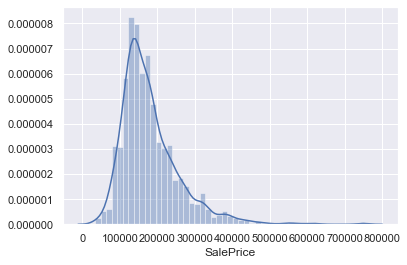

In [13]:
sns.distplot(df_train['SalePrice'])             #Plots graph
#skewness
print("Skewness: %f" % df_train['SalePrice'].skew())    #prints skewness

Skewness: 0.121335


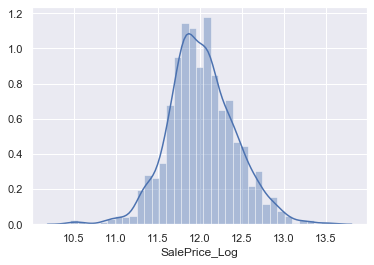

In [14]:
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice_Log'])
print("Skewness: %f" % df_train['SalePrice_Log'].skew())
df_train.drop('SalePrice', axis= 1, inplace=True)

# Numerical and Categorical features

In [15]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  43


In [16]:
print(df_train[numerical_feats].columns,'\n')
print(df_train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_Log'],
      dtype='object') 

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heati

# List of features with missing values

In [17]:
total_null = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total_null', 'mean'])
missing_data.head(30)

,Total_null,mean
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [18]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','GarageQual','GarageCond','GarageFinish',
               'GarageType', 'Electrical','KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st','BsmtExposure',
               'BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

In [19]:
total_null = df_train.isnull().sum().sort_values(ascending=False)
mean = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, mean], axis=1, keys=['Total_null', 'mean'])
missing_data.head(30)

,Total_null,mean
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice_Log,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000


In [20]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [21]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
SalePrice_Log,0,0.0
Heating,0,0.0
RoofStyle,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0


In [22]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice_Log    0
Length: 81, dtype: int64

In [23]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

# log transform

In [24]:
for col in numerical_feats:
    print('{:15}'.format(col),  
          'Skewness: {:05.2f}'.format(df_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.38     Kurtosis: 021.85
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.15
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

skewness:  12.207687851233496
kurtosis:  203.24327101886033


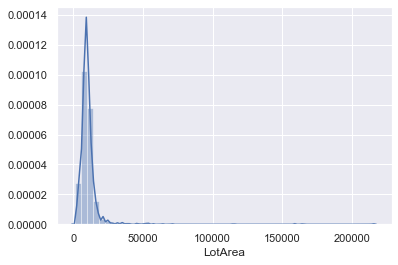

In [25]:
sns.distplot(df_train["LotArea"])
print("skewness: ", df_train["LotArea"].skew())
print("kurtosis: ", df_train["LotArea"].kurt())

skewness:  1.3767566220336365
kurtosis:  5.74584148244079


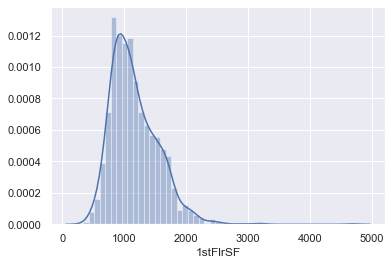

In [26]:
sns.distplot(df_train["1stFlrSF"])
print("skewness: ", df_train["1stFlrSF"].skew())
print("kurtosis: ", df_train["1stFlrSF"].kurt())

In [27]:
df_train["LotArea_log"] = np.log(df_train["LotArea"])
df_train.drop("LotArea", inplace = True, axis = 1)

df_train["1stFlrSF_log"] = np.log(df_train["1stFlrSF"])
df_train.drop("1stFlrSF", inplace = True, axis = 1)


skewness:  -0.1379938086958118
kurtosis:  4.713358369108622


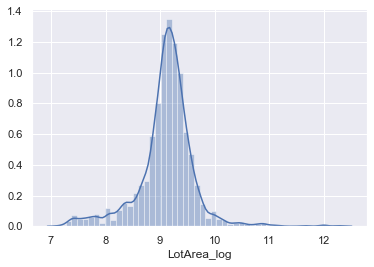

In [28]:
sns.distplot(df_train["LotArea_log"])
print("skewness: ", df_train["LotArea_log"].skew())
print("kurtosis: ", df_train["LotArea_log"].kurt())

skewness:  0.07915695223960692
kurtosis:  0.15080801512274444


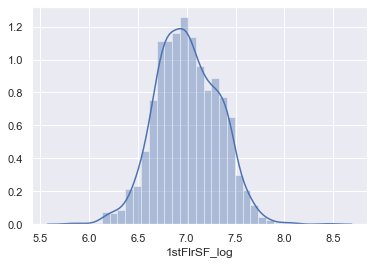

In [29]:
sns.distplot(df_train["1stFlrSF_log"])
print("skewness: ", df_train["1stFlrSF_log"].skew())
print("kurtosis: ", df_train["1stFlrSF_log"].kurt())

# 1.2 Relation of features to target (SalePrice_log)

# Plots of relation to target for all numerical features

In [30]:
df_train[target].index

RangeIndex(start=0, stop=1460, step=1)

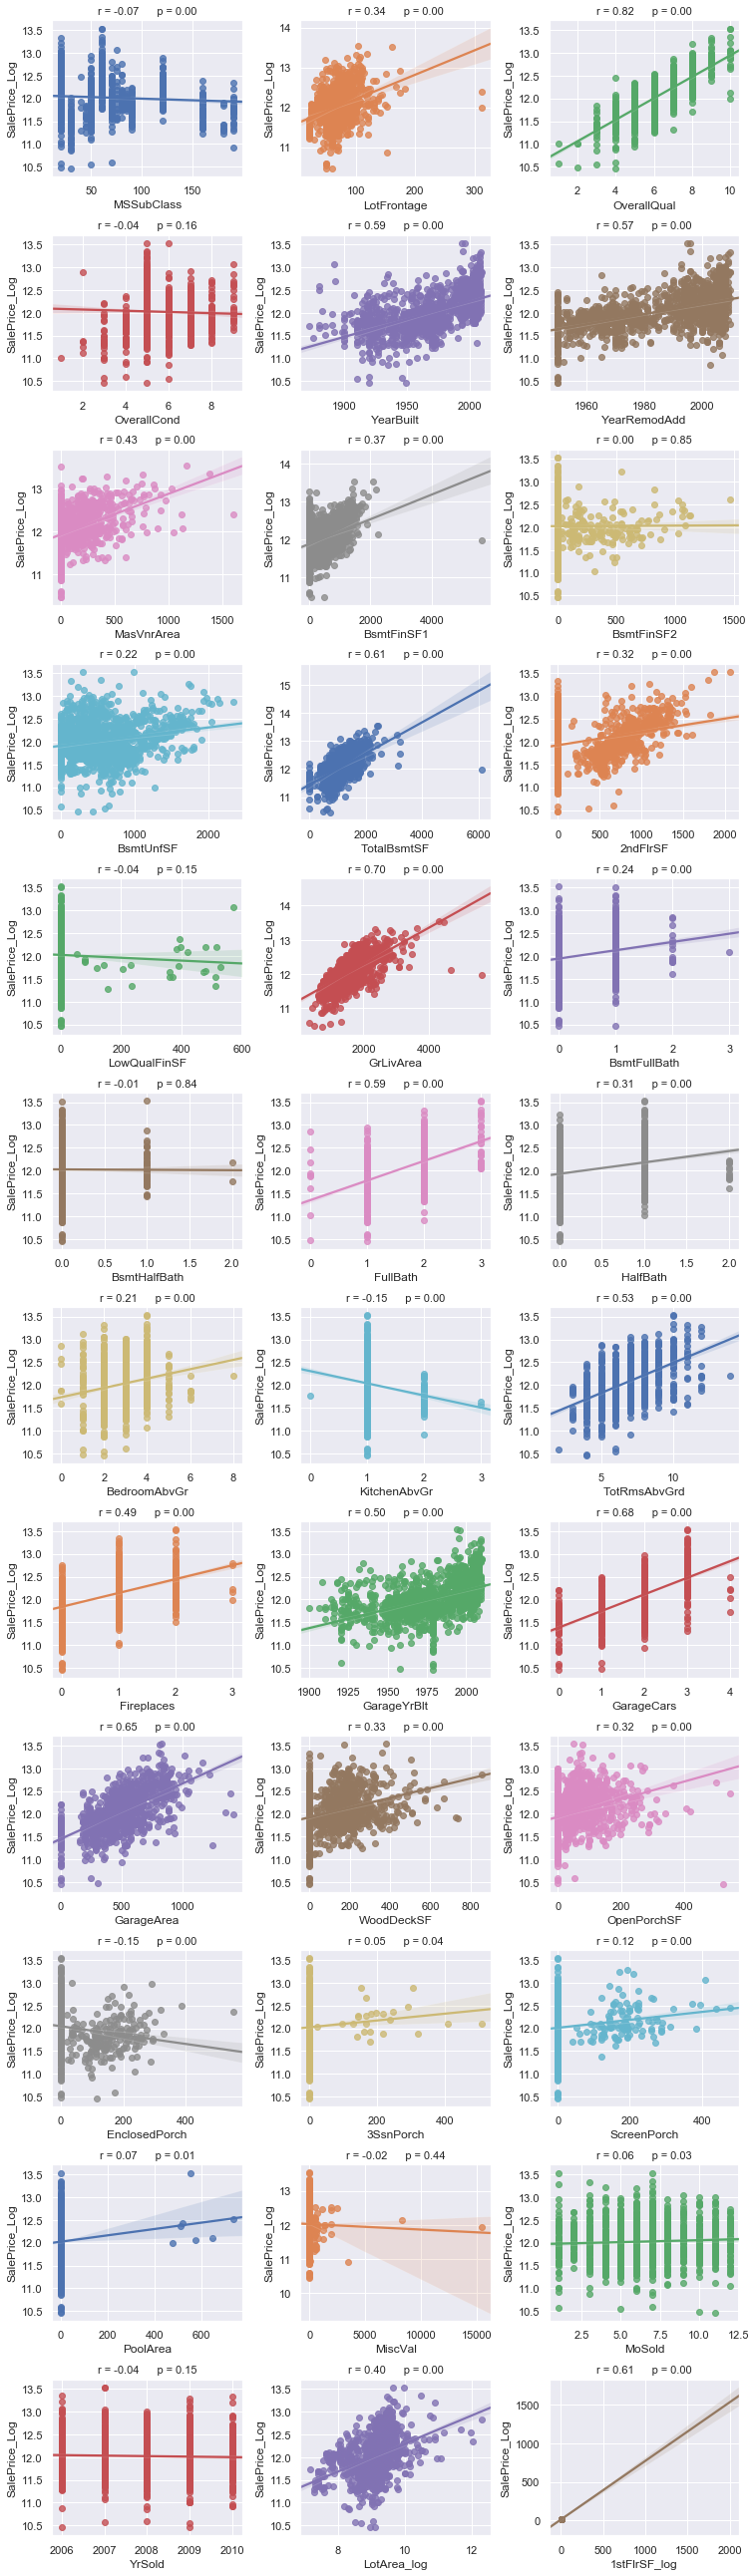

In [31]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)

log_param = ["LotArea_log", "1stFlrSF_log"]
li_num_feats.extend(log_param)

li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log','LotArea','1stFlrSF']
li_plot_num_feats = [c for c in li_num_feats if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

# Examples of relation of params with target i.e. SalePrice_Log

In [32]:
df_train = df_train.drop(
    df_train[(df_train['OverallQual']==10) & (df_train['SalePrice_Log']<12.3)].index)
#df_train.head(30)

In [33]:
df_train = df_train.drop(
    df_train[(df_train['LotArea_log']>8.3) & (df_train['SalePrice_Log']<12.5)].index)
#df_train.head(30)

# Find columns with strong correlation to target

In [34]:
corr = df_train.corr()
#print(corr)
corr_abs = corr.abs()
print(len(df_train.columns),len(corr_abs))

81 38


In [35]:
nr_num_cols = len(numerical_feats)

ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]
print("ser_corr: ",'\n',ser_corr,'\n') 
print("min_val_corr: ",min_val_corr,'\n')

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
print("cols_abv_corr_limit: ",cols_abv_corr_limit,'\n')

cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)
print("cols_bel_corr_limit: ",cols_bel_corr_limit)

ser_corr:  
 SalePrice_Log    1.000000
OverallQual      0.858530
1stFlrSF_log     0.845410
LotArea_log      0.839425
GarageArea       0.807021
GarageCars       0.806901
TotalBsmtSF      0.784807
GrLivArea        0.784390
MSSubClass       0.759227
LotFrontage      0.755224
TotRmsAbvGrd     0.689510
Fireplaces       0.660377
YearRemodAdd     0.593362
FullBath         0.584993
BsmtFinSF1       0.510353
GarageYrBlt      0.454649
MasVnrArea       0.403209
YearBuilt        0.371090
WoodDeckSF       0.370232
BsmtFullBath     0.363147
OpenPorchSF      0.360192
BedroomAbvGr     0.320549
BsmtUnfSF        0.255889
ScreenPorch      0.175494
2ndFlrSF         0.149787
PoolArea         0.094685
MoSold           0.092567
3SsnPorch        0.086273
Id               0.070566
OverallCond      0.062028
LowQualFinSF     0.054731
YrSold           0.043223
EnclosedPorch    0.030491
BsmtFinSF2       0.027449
MiscVal          0.016994
BsmtHalfBath     0.014157
HalfBath         0.006935
Name: SalePrice_Log, dtyp

# List of categorical features and their unique values

In [36]:
for cat in list(categorical_feats) :
    print(df_train[cat].value_counts(),'\n')

RL    186
RM     53
FV     28
Name: MSZoning, dtype: int64 

Pave    267
Name: Street, dtype: int64 

None    247
Pave     16
Grvl      4
Name: Alley, dtype: int64 

Reg    167
IR1     89
IR2      9
IR3      2
Name: LotShape, dtype: int64 

Lvl    239
HLS     17
Low      9
Bnk      2
Name: LandContour, dtype: int64 

AllPub    267
Name: Utilities, dtype: int64 

Inside     202
Corner      33
CulDSac     24
FR2          6
FR3          2
Name: LotConfig, dtype: int64 

Gtl    251
Mod     13
Sev      3
Name: LandSlope, dtype: int64 

NridgHt    57
Somerst    35
NoRidge    29
BrDale     16
Blmngtn    16
StoneBr    15
MeadowV    15
Timber     14
CollgCr    13
Edwards     9
OldTown     9
Crawfor     8
SawyerW     6
NPkVill     5
ClearCr     5
Veenker     4
NWAmes      3
Gilbert     3
Blueste     2
IDOTRR      1
Mitchel     1
NAmes       1
Name: Neighborhood, dtype: int64 

Norm      255
PosN        4
Artery      3
RRNn        2
RRAn        2
PosA        1
Name: Condition1, dtype: int64 

Nor

# Relation to SalePrice for all categorical features

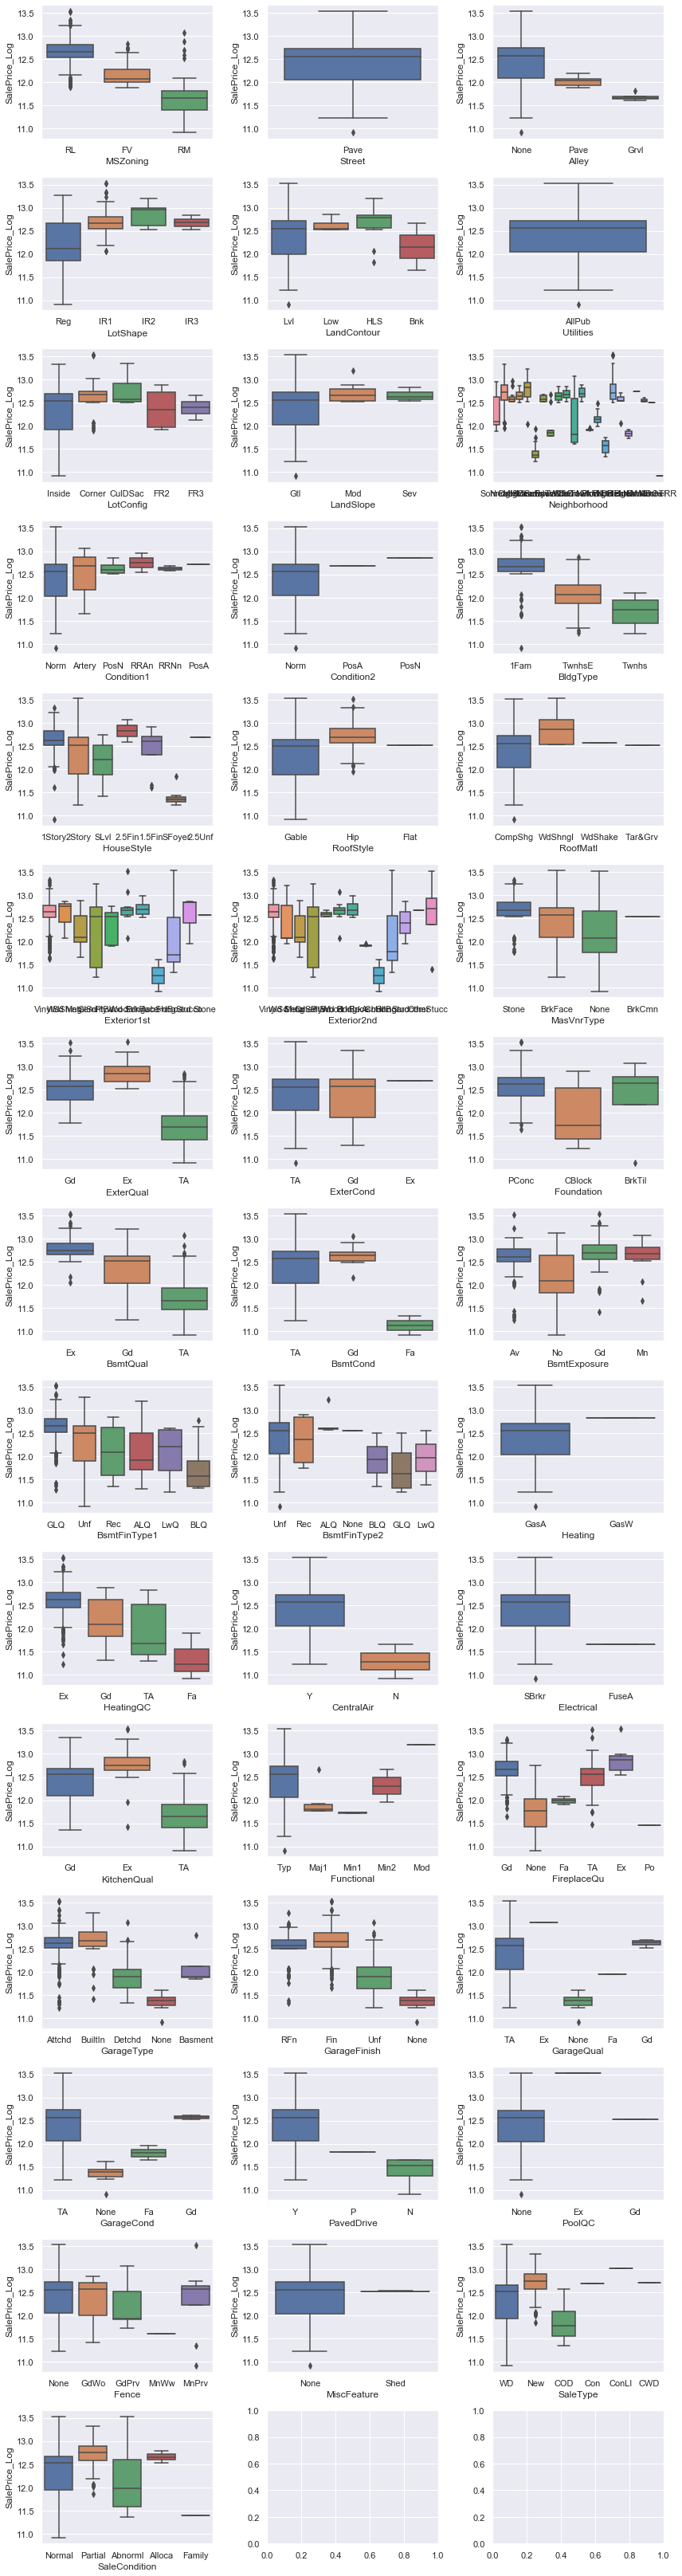

In [37]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

# Features with largest correlation to revenue_Log

#Correlation matrix with r above min_val_corr

In [38]:
abv_feats = len(cols_abv_corr_limit)

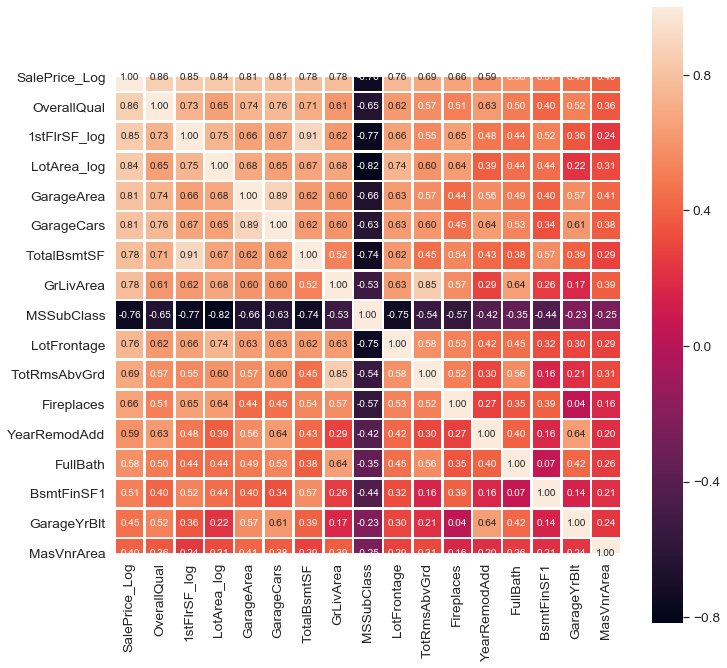

In [39]:
plot_corr_matrix(df_train, abv_feats, target)

#Correlation matrix with r below min_val_corr

In [40]:
bel_feats = len(cols_bel_corr_limit)

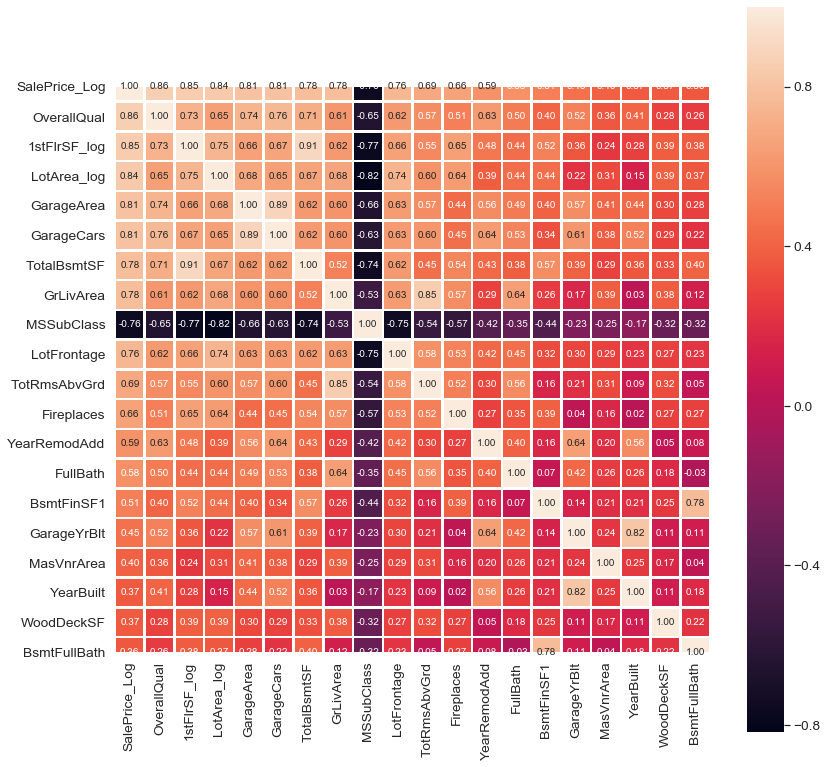

In [41]:
plot_corr_matrix(df_train, bel_feats, target)

# Training of dataset

In [50]:
data = df_train.select_dtypes(include=[np.number]).interpolate().dropna()

In [51]:
sum(data.isnull().sum() != 0)

0

In [89]:
y = np.log(df_train.SalePrice_Log)
X = data.drop(['SalePrice_Log', 'Id'], axis=1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

# Building of linear model

In [91]:
linreg = LinearRegression()
linreg_model = linreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

R-Squared for Train set: 0.966
R-Squared for test set: 0.935


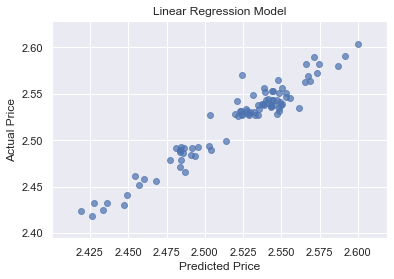

In [92]:
predictions = linreg_model.predict(X_test)
actual_values = y_test

plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()